### Data Cleaning and EDA: time

In [1]:
# Libraries import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import re

In [2]:
# Looking at downloaded posts timelines and intensity
dm = pd.read_csv('./data/DunderMifflin_df_original.csv')
of = pd.read_csv('./data/office_df_original.csv')

In [3]:
dm.head()

,title,selftext,author,id,score,comments,link,subreddit,created
0,the boss makes sure that everyone feels includ...,NaN,DwightScott69,10d616x,4,0,https://i.redd.it/6fvo0i87tdca1.jpg,DunderMifflin,1.673847e+09
1,"Today, let us NOT forget the words of the Reve...",NaN,Trick_Listen,10d5pb9,2,2,https://i.redd.it/makfdif2qdca1.jpg,DunderMifflin,1.673846e+09
2,Why did Michael’s half-sister cut him off from...,NaN,Worthy_Planet375,10d5krh,4,8,https://i.redd.it/lgpg18i0pdca1.jpg,DunderMifflin,1.673845e+09
3,"Besides Jim and Dwight, who are your favorite ...",Michael and Toby\nPam and Ryan\nAngela and Phy...,Cool_Value1204,10d5501,0,10,https://www.reddit.com/r/DunderMifflin/comment...,DunderMifflin,1.673844e+09
4,In case you haven’t noticed…,NaN,CallingYouForMoney,10d52fp,14,2,https://www.reddit.com/gallery/10d52fp,DunderMifflin,1.673844e+09


In [4]:
of.head()

,title,selftext,author,id,score,comments,link,subreddit,created
0,Friend or just a colleague,Hi is it just my colleagues that are toxic and...,Sadvibesonly96,10cphg1,1,0,https://www.reddit.com/r/office/comments/10cph...,office,1.673804e+09
1,Printer systems,Good morning. \n\nI'm looking for a no-frills ...,mortsmad,10bp8rr,1,0,https://www.reddit.com/r/office/comments/10bp8...,office,1.673705e+09
2,What Would You Do?,Hello everyone!\n\nFirst time posting here.\nI...,cherrydolewhip,10bkedf,1,4,https://www.reddit.com/r/office/comments/10bke...,office,1.673688e+09
3,attention yo!,I don't want to go to office for a day and the...,Cynthia_OMO,10bjk5p,1,0,https://www.reddit.com/r/office/comments/10bjk...,office,1.673685e+09
4,Do you have any office-related wisdom to share...,"Hey guys,\n\nI am a young 23M who last year th...",AssSpelunker69,10bd0fx,1,13,https://www.reddit.com/r/office/comments/10bd0...,office,1.673663e+09


In [5]:
# Converting epoch column to datetime format
dm['created'] = dm['created'].astype(int)
of['created'] = of['created'].astype(int)
dm['created'] = pd.to_datetime(dm['created'], unit='s') # UNIX time might be in seconds, milliseconds, microseconds and nanoseconds, so we have to specify units as seconds
of['created'] = pd.to_datetime(of['created'], unit='s')

In [6]:
# Saving colors to variables
c1 = '#BE3455'
c2 = '#34BE9D'

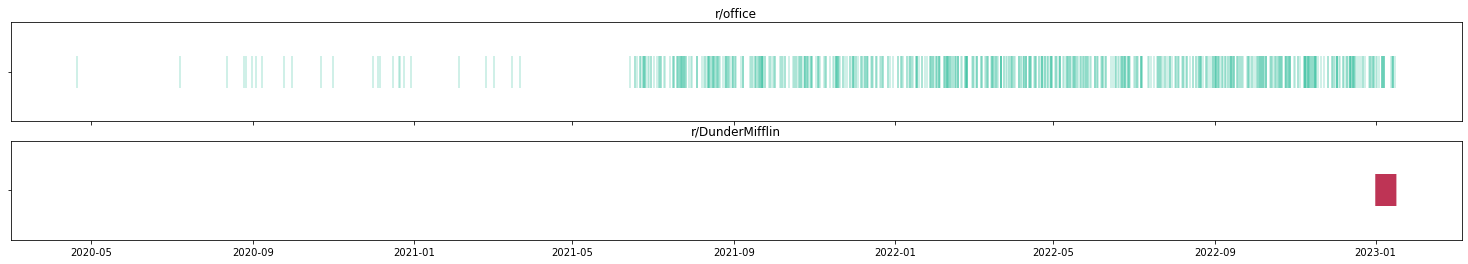

In [7]:
# Plotting subreddits posts timelines and density
fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize=(26,4), sharex=True)

sns.regplot(x=of['created'], y=of['subreddit'], marker = '|', fit_reg=False, scatter_kws={'color':c2,'alpha':0.3,'s':1000}, ax = ax1) # plotting r/office timeline
sns.regplot(x=dm['created'], y=dm['subreddit'], marker = '|', fit_reg=False, scatter_kws={'color':c1,'alpha':0.1,'s':1000}, ax = ax2) # plotting DunderMifflin timeline

ax1.set(xlabel='',ylabel='', title = 'r/office', yticklabels='') # formatting r/office subplot
ax2.set(xlabel='',ylabel='', title = 'r/DunderMifflin', yticklabels='') # formatting r/DunderMifflin subplot

plt.savefig('./images/posts_density.png', dpi = 100); # saving plot

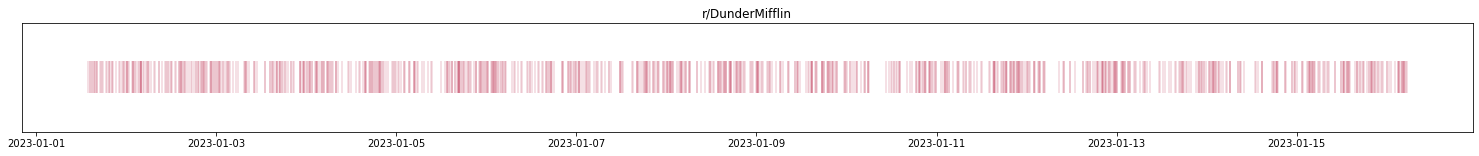

In [8]:
# Looking at DunderMifflin posts density closer
plt.figure(figsize = (26, 2)) # canvas
sns.regplot(x=dm['created'], y=dm['subreddit'], marker = '|', fit_reg=False, scatter_kws={'color':c1,'alpha':0.2,'s':1000}) # plotting
plt.title('r/DunderMifflin') # title name and font
plt.tick_params(labelleft = False, left = False) # removing x axis ticks and label
plt.xlabel('') # removing x axis label
plt.ylabel('') # removing y axis label
plt.savefig('./images/DunderMifflin_posts_density.png', dpi = 100); # saving plot

Charts above show that two subreddits differ in time ranges of posts used in this project. It's intentional to reach a relatively similar number of posts to feed into classification models. Also, after plotting timeseries of posts, I've found an interesting detail: r/office subreddit became active only in the summer of 2021. I'm wondering if it's related to the fact that people stopped working from home around that time. 

### EDA: other attributes

In [9]:
dm.shape

(993, 9)

In [10]:
of.shape

(793, 9)

In [11]:
# Checking for null values
dm.isnull().sum()

title          0
selftext     684
author         7
id             0
score          0
comments       0
link           0
subreddit      0
created        0
dtype: int64

In [12]:
of.isnull().sum()

title          0
selftext     336
author        16
id             0
score          0
comments       0
link           0
subreddit      0
created        0
dtype: int64

#### Post body without text

In [13]:
dm.selftext.isnull().value_counts(normalize = True)

True     0.688822
False    0.311178
Name: selftext, dtype: float64

In [14]:
of.selftext.isnull().value_counts(normalize = True)

False    0.576293
True     0.423707
Name: selftext, dtype: float64

r/office has 42% of posts without text body, whereas r/DunferMifflin has more: 69%.

#### Most active content generators

In [15]:
of.author.value_counts().head(10)

Zyeta                  68
Remote-Virus-5547      22
daslawdawg             11
94sud                   9
RolandMT32              9
Odd-Bluebird2523        9
mahtabpowerpoint        8
dandy-2902              8
indiaartndesign         6
thumbsdrivesmecrazy     4
Name: author, dtype: int64

In [16]:
dm.author.value_counts().head(10)

Mysterious-Face-8272    8
themediocrekid          5
Cool_Value1204          5
nikes-                  5
KingKrush8282           5
HopScotchyScotch        4
Jim_Morrison27          4
New-Engineering1483     4
ElfHaze                 4
Traditional-Bag-6001    4
Name: author, dtype: int64

r/office subreddit has several authors that made a lot of posts over time, when r/DunderMifflin is more disperse authorwise.

#### Posts popularity 

In [17]:
of['score'].describe()

count    793.000000
mean       2.711223
std        4.052196
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       41.000000
Name: score, dtype: float64

In [18]:
dm['score'].describe()

count      993.000000
mean       474.023162
std       2000.869037
min          0.000000
25%          2.000000
50%         14.000000
75%         91.000000
max      29513.000000
Name: score, dtype: float64

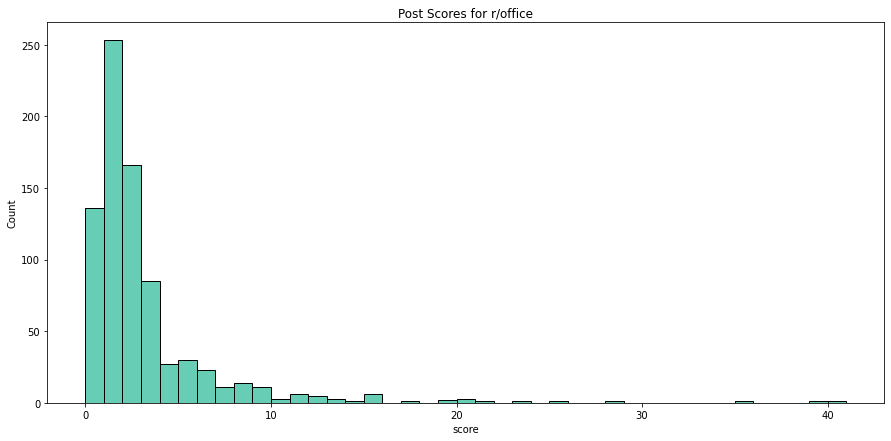

In [19]:
plt.figure(figsize=(15,7))
sns.histplot(of['score'], color = c2, binwidth = 1)
plt.title('Post Scores for r/office');

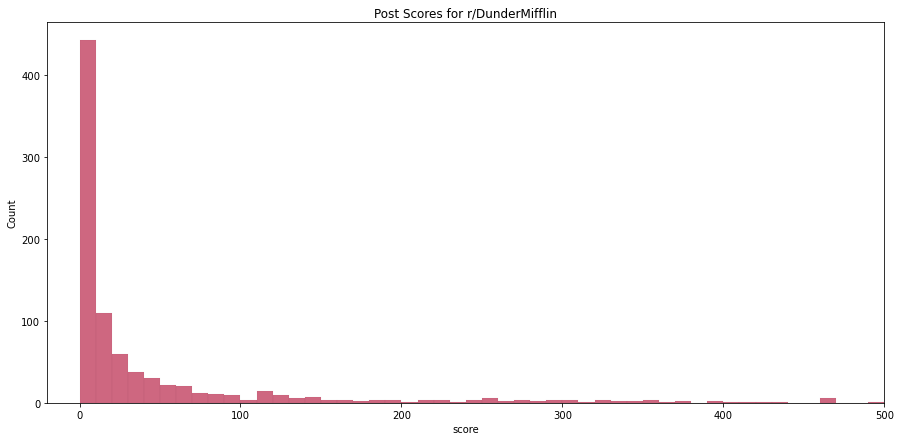

In [20]:
plt.figure(figsize=(15,7))
sns.histplot(dm['score'], color = c1, binwidth=10)
plt.title('Post Scores for r/DunderMifflin')
plt.xlim(-20, 500); # There are large score values like 30_000, so I cropped them off to look at the main part of distribution better

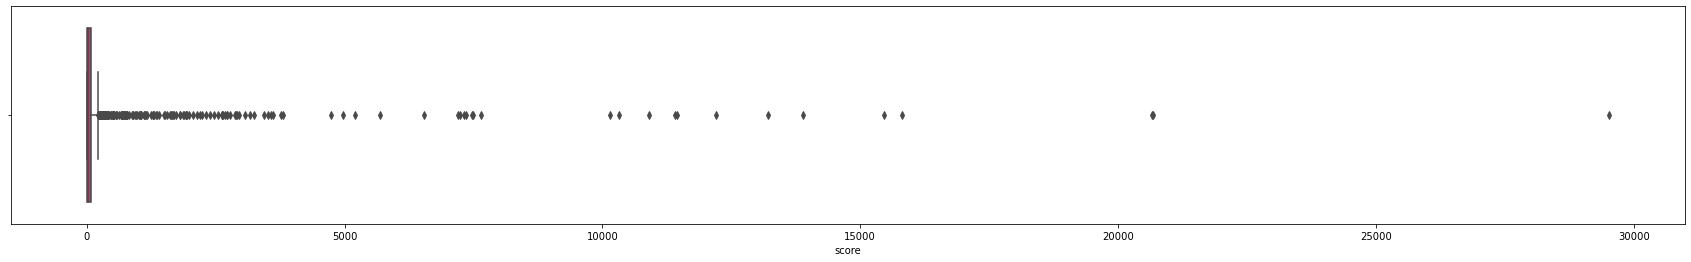

In [21]:
# Looking at the whole range of posts scores
plt.figure(figsize=(30,4))
sns.boxplot(x = dm['score'], color = c1);

In [22]:
# Checking out the post with the highest score
dm[dm['score']==29513]

,title,selftext,author,id,score,comments,link,subreddit,created
455,Is this supposed to be the hole that Andy punc...,NaN,Jacagain,1070dfh,29513,586,https://i.redd.it/sfyftz9dmyaa1.png,DunderMifflin,2023-01-09 01:13:32


In [23]:
# Oh it's about 'The Office' lego! I've just got one for myself today, can't wait to have more time on my hands to start building The Office!

In [24]:
# Looking at most frequent posts scores
of['score'].sort_values().value_counts(normalize=True).head(5)

1    0.319042
2    0.209332
0    0.171501
3    0.107188
5    0.037831
Name: score, dtype: float64

In [25]:
dm['score'].sort_values().value_counts(normalize=True).head(5)

0    0.143001
2    0.056395
1    0.051360
3    0.039275
5    0.038268
Name: score, dtype: float64

In [26]:
print(f'r/office scores: median = {of.score.median()}, mode = {of.score.mode()}');
print(f'r/DunderMifflin scores: median = {dm.score.median()}, mode = {dm.score.mode()}');

r/office scores: median = 2.0, mode = 0    1
Name: score, dtype: int64
r/DunderMifflin scores: median = 14.0, mode = 0    0
Name: score, dtype: int64


r/DunderMifflin has bigger range of post scores up to 29_513 versus 0-41 for r/office, likely because the community itself is more popular. On another hand, subreddits share something in common here: the majority of posts has low scores like 0-3.  
Let's look at comments.


In [27]:
of['comments'].describe()

count    793.000000
mean       1.940731
std        2.944824
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max       18.000000
Name: comments, dtype: float64

In [28]:
dm['comments'].describe()

count     993.000000
mean       31.151057
std        79.590328
min         0.000000
25%         4.000000
50%         8.000000
75%        20.000000
max      1004.000000
Name: comments, dtype: float64

In [29]:
of['comments'].sort_values().value_counts(normalize = True).head()

0    0.451450
1    0.162673
2    0.118537
4    0.070618
3    0.066835
Name: comments, dtype: float64

In [30]:
dm['comments'].sort_values().value_counts(normalize=True).head()

3    0.078550
2    0.077543
4    0.076536
1    0.069486
5    0.062437
Name: comments, dtype: float64

In [31]:
print(f'r/office scores: median = {of.comments.median()}, mode = {of.comments.mode()}');
print(f'r/DunderMifflin scores: median = {dm.comments.median()}, mode = {dm.comments.mode()}');

r/office scores: median = 1.0, mode = 0    0
Name: comments, dtype: int64
r/DunderMifflin scores: median = 8.0, mode = 0    3
Name: comments, dtype: int64


Average number of comments is significantly bigger for r/DunderMifflin: 
* average: 31 vs 2
* median: 8 vs 1
* most frequent number of comments: 3 vs 0

These numbers support the assumption that r/DunderMifflin is in general more popular subreddit compared to r/office.

### Data Cleaning
1. Removing columns that won't participate in NLP
1. Joining dataframes
3. Replacing NaNs with empty strings
2. Merging title and body columns
1. Removing special characters


In [32]:
# Removing everything except text and subreddit
of.drop(columns = ['author', 'id', 'score', 'comments', 'link', 'created'], inplace = True)
dm.drop(columns = ['author', 'id', 'score', 'comments', 'link', 'created'], inplace = True)

In [33]:
# Merging posts into one Data Frame
df = pd.concat([of, dm])

In [34]:
# Replacing NaN with empty strings
df['selftext'].fillna('', inplace = True)

In [35]:
# Merging title and body into single column
df['text'] = df['title'] + ' ' + df['selftext']

In [36]:
# Removing original text columns
df.drop(columns = ['title', 'selftext'], inplace = True)
df.head()

,subreddit,text
0,office,Friend or just a colleague Hi is it just my co...
1,office,Printer systems Good morning. \n\nI'm looking ...
2,office,What Would You Do? Hello everyone!\n\nFirst ti...
3,office,attention yo! I don't want to go to office for...
4,office,Do you have any office-related wisdom to share...


### Advanced Cleaning / Preprocessing
After doing NLP EDA, I've realized there are a lot of words, bigrams and trigrams generated from vectorized links, so I'm going to remove links. They might be potentially useful for post classification, but I think that it's no fair for the *natural* language processing.
Also, I'm going to remove some of the special characters, that are used for text formatting.

In [37]:
# Looking at posts with links
df.text[df['text'].str.contains('https')][21]

"How to create a happy workplace? &#x200B;\n\nhttps://preview.redd.it/98ba4z61009a1.png?width=954&format=png&auto=webp&v=enabled&s=6648926f5c79fd4a262ef08fce0ef9728ec64dc0\n\nDid you know that 59% of the Indian workforce is unhappy with their workplace?\n\nLet's look at the factors that contribute to this statistic. They include\n\n* **Basic needs**\\- In addition to salary, employees require support in terms of healthcare, insurance, etc. Employees tend to be unhappy or dissatisfied when such needs are unmet. \n* **Autonomy**\\- Unhealthy power dynamics and exploitative relationships lead to unmotivated employees. \n* **Mastery**\\- A work environment that does not provide the resources or environment for employees to learn and grow leads to a decline in motivation or interest to persist. \n* **Belonging**\\- Lack of community or comradery within the workplace can make employees feel disconnected and lead to increased absenteeism. \n\nNow you may have heard about the workplace culture

In [38]:
# Removing /n
df['text'] = df['text'].str.replace('\n','')

# Removing &#x200B;
df['text'] = df['text'].str.replace('&#x200B;','')

# Removing links, but before that adding a whitespace to the end of every post so links in the end are detected as well
df['text'] = df['text'] + ' '
df['text'] = df['text'].str.replace(r'https\S+\s', ' ', regex=True)

In [39]:
# Checking result
df.text[df['text'].str.contains('How to create a happy workplace?')][21]

"How to create a happy workplace?  you know that 59% of the Indian workforce is unhappy with their workplace?Let's look at the factors that contribute to this statistic. They include* **Basic needs**\\- In addition to salary, employees require support in terms of healthcare, insurance, etc. Employees tend to be unhappy or dissatisfied when such needs are unmet. * **Autonomy**\\- Unhealthy power dynamics and exploitative relationships lead to unmotivated employees. * **Mastery**\\- A work environment that does not provide the resources or environment for employees to learn and grow leads to a decline in motivation or interest to persist. * **Belonging**\\- Lack of community or comradery within the workplace can make employees feel disconnected and lead to increased absenteeism. Now you may have heard about the workplace culture at companies like Google and Microsoft. They are known to create a safe, comfortable, and engaging environment for their employees. There are various benefits as

In [40]:
# Looks good, but I would remove special characters like * or \\ as well
df['text'] = df['text'].str.replace('\\','', regex = False)
df['text'] = df['text'].str.replace('*','', regex = False)

In [56]:
# Saving cleaned data
df.to_csv('./data/data_cleaned.csv', index = False)